In [24]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plot
import pickle
from matplotlib import style

In [25]:
#reading data


In [26]:
data=pd.read_csv('student-mat.csv',sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
#trimming data

In [28]:
data=data[["G1","G2","G3","studytime","failures","absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [29]:
predict="G3"

In [30]:
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [31]:
#splitting

In [32]:
best=0


In [39]:
for _ in range(30):
    
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)
    #splits 10% of our data for testing 
    linear=linear_model.LinearRegression()
    #training data
    linear.fit(x_train,y_train) # going to fit x_train data and y_train data to find the best fit line
    acc=linear.score(x_test,y_test) #will tell the accuracy of our model
    print(acc)
    if acc>best:
        with open("studentgrademodel.pickle",'wb') as f:
            pickle.dump(linear,f)
    
    
    

0.7747833472828102
0.8956780475815244
0.9143180346392265
0.8815304226204514
0.9319761886405011
0.7249263523934499
0.7442515787760093
0.8127688938199199
0.6415029868828591
0.8259120538843168
0.8641398490599169
0.6389430907807692
0.8491672671725058
0.8733991884848815
0.7881488056818011
0.8934557266389054
0.8934434071604036
0.9217243262937828
0.8196994382232365
0.9064795883895983
0.8481017802548139
0.725461078776112
0.7713880594626823
0.7951860729445162
0.8657028193363531
0.7897565146259001
0.7407912850861571
0.8908130187435203
0.897422369470144
0.8402050823674252


In [40]:

#commenting after saving our model

In [41]:
pickle_in=open("studentgrademodel.pickle",'rb')
linear=pickle.load(pickle_in)

In [42]:
print("co:",linear.coef_)    #tells the coeffecient of our line
print("intercept:",linear.intercept_)   # tells the intercept of our line

co: [ 0.1565948   0.9748695  -0.17673875 -0.32453873  0.04768508]
intercept: -1.5606544241080265


In [43]:
#testing

In [23]:
predictions=linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

13.028113885630027 [10 13  1  0 12] 12
10.451992767498213 [10 11  4  0 10] 11
9.316531121874329 [ 9  9  1  0 22] 9
7.925913001556234 [10  8  1  0  6] 11
9.627650276014943 [10 10  2  0  4] 11
6.81990369482496 [ 6  8  1  3 16] 8
8.57298031913872 [10  9  3  0  7] 9
8.01753949393162 [7 9 1 1 2] 8
5.903331080136899 [ 8  6  2  0 18] 7
18.39188414387135 [18 18  4  0  6] 18
7.291838793811548 [8 8 2 0 2] 8
15.148083668502034 [15 15  2  0  0] 15
15.064437166819376 [14 15  2  0  2] 15
8.34064299845043 [8 9 2 0 4] 10
12.79953575417629 [12 13  2  0  2] 13
5.465134230652681 [ 7  6  2  0 10] 6
9.473093704771973 [ 9 10  2  0  4] 10
15.657190587546564 [16 15  2  0 10] 15
15.373550309305317 [16 15  2  0  2] 15
9.556740206454633 [10 10  2  0  2] 11
12.351464960957323 [10 13  2  1  6] 13
11.069214124822429 [13 11  2  0  4] 11
8.507936001815748 [10  9  2  0  0] 0
9.448477317260203 [ 8  9  1  1 38] 8
7.094707505640557 [9 8 2 1 0] 0
7.661988062123051 [ 9  8  2  1 16] 7
8.395705145237942 [10  9  3  0  2] 9
8.

In [44]:
#plotting our data

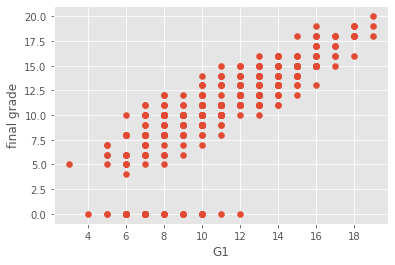

In [45]:
p="G1"
style.use("ggplot")
plot.scatter(data[p],data['G3'])
plot.xlabel(p)
plot.ylabel('final grade')
plot.show()